<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/Text_Analysis_and_Essay_Grading_Langgraph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Text Classification
2. Entity Extraction
3. Text Summarization

In [1]:
!pip install langchain langchain_core langchain_community langgraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 411.6/411.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.7/135.7 kB 9.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: langchain_core
    Found existing installation: langchain-core 0.3.25
    Uninstalling langchain-core-0.3.25:
      Successfully uninstalled langchain-core-0.3.25
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.12
    Uninstalling langchain-0.3.12:
      Successfully uninstalled langchain-0.3.12


In [2]:
from typing import TypedDict, Dict,List

Build the text processing pipeline
1. Define State and Initialize LLM
2. Define Node Function
3. Create Tools & Build Workflow
4. Visualize the Workflow
5. Testing a Pipeline

In [3]:
from langgraph.graph import StateGraph, END
from langchain.prompts import PromptTemplate
from langchain.schema import HumanMessage
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image

In [4]:
class State(TypedDict):
  text: str
  classification:str
  entities:List[str]
  summary:str

In [5]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 kB 9.3 MB/s eta 0:00:00


In [6]:
from google.colab import userdata
import os
os.environ['GROQ_API_KEY']=userdata.get('groq_api_key')

In [7]:
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature=0,
    model="llama-3.3-70b-versatile"
)
result = llm.invoke("What is LLM?")
result.content

'LLM stands for Large Language Model. It refers to a type of artificial intelligence (AI) designed to process and understand human language at a large scale. LLMs are trained on vast amounts of text data, which enables them to learn patterns, relationships, and structures of language, allowing them to generate human-like text, answer questions, and even converse with humans.\n\nLLMs are typically based on deep learning architectures, such as transformer models, and are trained using massive datasets of text from various sources, including books, articles, research papers, and websites. This training allows LLMs to develop a broad understanding of language, including grammar, syntax, semantics, and pragmatics.\n\nSome key features of LLMs include:\n\n1. **Language understanding**: LLMs can comprehend and interpret human language, including nuances and context.\n2. **Text generation**: LLMs can generate coherent and natural-sounding text, often indistinguishable from human-written text.\

In [8]:
# Node Functions
def classification_node(state:State):
  "Research, News, Blog, or Others"
  prompt = PromptTemplate(
      input_variable=["text"],
      template="Classify the following text into one of the Categories: News, Blog, Research,or Others.\n\nText:{text}\n\nCategory:"
  )

  message = HumanMessage(content=prompt.format(text=state["text"]))
  classification = llm.invoke([message]).content.strip()
  return {"classification":classification}

def entity_extraction_node(state:State):
  prompt = PromptTemplate(
      input_variable=["text"],
      template="Extracting all the entities (Person, Organization, Location) from the following text. Provide the result as a comma separated list.\n\n Text:{text}\n\nEntities",
  )
  message = HumanMessage(content=prompt.format(text=state["text"]))
  entities = llm.invoke([message]).content.strip().split(",")
  return {"entities":entities}

def summarization_node(state:State):
  prompt = PromptTemplate(
      input_variable=["text"],
      template="Summarize the following text.\n\nText:{text}\n\nSummary:",
  )
  message = HumanMessage(content=prompt.format(text=state["text"]))
  summary = llm.invoke([message]).content.strip()
  return {"summary":summary}

In [9]:
workflow = StateGraph(State)

workflow.add_node("classification_node",classification_node)
workflow.add_node("entity_extraction_node",entity_extraction_node)
workflow.add_node("summarization_node",summarization_node)

workflow.set_entry_point("classification_node")

workflow.add_edge("classification_node","entity_extraction_node")
workflow.add_edge("entity_extraction_node","summarization_node")
workflow.add_edge("summarization_node",END)

app = workflow.compile()

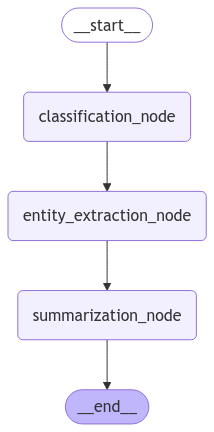

In [10]:
# Visualize the workflow
display(Image(
  app.get_graph().draw_mermaid_png(
      draw_method=MermaidDrawMethod.API
  )
))

In [11]:
# Testing the Pipeline

In [12]:
SAMPLE_TEXT = """
The tech company InnovateX, based in San Francisco, announced the launch of its latest product, the AI-powered assistant called NeuronX, during a press conference on December 15, 2024. This assistant is designed to revolutionize productivity by integrating seamlessly with existing tools like Slack, Microsoft Teams, and Zoom.

During the event, John Smith, CEO of InnovateX, emphasized the company’s commitment to leveraging artificial intelligence to solve real-world problems. He stated that NeuronX incorporates cutting-edge natural language processing (NLP) algorithms to provide users with contextual insights, task management features, and seamless meeting scheduling.

Additionally, InnovateX revealed its partnership with GreenTech Solutions, a leader in sustainable technology, to integrate eco-friendly AI practices into NeuronX’s development. This initiative aligns with global efforts to reduce carbon emissions from AI computation.

The launch has sparked interest across industries, with early adopters in the healthcare and education sectors praising its potential. Critics, however, have raised concerns about privacy and data security, especially given the increasing reliance on cloud-based AI solutions.
"""
state_input = {"text":SAMPLE_TEXT}
result = app.invoke(state_input)
print(result)

{'text': '\nThe tech company InnovateX, based in San Francisco, announced the launch of its latest product, the AI-powered assistant called NeuronX, during a press conference on December 15, 2024. This assistant is designed to revolutionize productivity by integrating seamlessly with existing tools like Slack, Microsoft Teams, and Zoom.\n\nDuring the event, John Smith, CEO of InnovateX, emphasized the company’s commitment to leveraging artificial intelligence to solve real-world problems. He stated that NeuronX incorporates cutting-edge natural language processing (NLP) algorithms to provide users with contextual insights, task management features, and seamless meeting scheduling.\n\nAdditionally, InnovateX revealed its partnership with GreenTech Solutions, a leader in sustainable technology, to integrate eco-friendly AI practices into NeuronX’s development. This initiative aligns with global efforts to reduce carbon emissions from AI computation.\n\nThe launch has sparked interest acr

In [13]:
print("Classification :",result['classification'])
print("\n")
print("Entities :",result['entities'])
print("\n")
print("Summary :",result['summary'])

Classification : Category: News

The text appears to be a news article, as it reports on a recent event (the launch of NeuronX) and provides factual information about the product, the company, and its partnerships. The text also includes quotes from the CEO and mentions the reactions of various stakeholders, which is typical of news reporting. Additionally, the text is written in a neutral and objective tone, which is also characteristic of news articles.


Entities : ['InnovateX', ' San Francisco', ' NeuronX', ' Slack', ' Microsoft Teams', ' Zoom', ' John Smith', ' GreenTech Solutions', ' December']


Summary : InnovateX, a San Francisco-based tech company, has launched NeuronX, an AI-powered assistant designed to boost productivity by integrating with tools like Slack and Zoom. The assistant uses natural language processing algorithms to provide contextual insights and task management features. InnovateX has also partnered with GreenTech Solutions to incorporate eco-friendly AI pract

## Essay Grading

1. Content Relevance
2. Grammar Check
3. Structure Analysis
4. Depth of Analysis

In [17]:
from typing import TypedDict
from langgraph.graph import StateGraph,END
from langchain.prompts import ChatPromptTemplate
from langchain_core.runnables.graph import MermaidDrawMethod
from IPython.display import display, Image
import re

In [19]:
class State(TypedDict):
  essay:str
  relevance_score: float
  grammar_score: float
  structure_score: float
  depth_score: float
  final_score:float

In [20]:
from google.colab import userdata
import os
os.environ['GROQ_API_KEY']=userdata.get('groq_api_key')

In [24]:
# LLM Initialization
from langchain_groq import ChatGroq
llm = ChatGroq(
    temperature=0,
    model="llama-3.3-70b-versatile"
)
result = llm.invoke("What is OPEN AI?")
result.content

'OpenAI is a non-profit artificial intelligence (AI) research organization that aims to develop and promote friendly AI that benefits humanity. The organization was founded in 2015 by a group of technology entrepreneurs, including Elon Musk, Sam Altman, and Greg Brockman, among others.\n\nOpenAI\'s primary goal is to advance the field of AI in a way that is transparent, accountable, and beneficial to society as a whole. To achieve this, the organization focuses on several key areas:\n\n1. **Research**: OpenAI conducts research in various areas of AI, including machine learning, natural language processing, computer vision, and robotics.\n2. **Development**: The organization develops and releases open-source AI software and tools, such as language models, chatbots, and other AI-powered applications.\n3. **Deployment**: OpenAI works with partners to deploy AI systems in real-world settings, such as healthcare, education, and transportation.\n4. **Safety and Governance**: The organization

In [55]:
### Grading Node Function

import re

def extract_score(content: str) -> float:
    match = re.search(r"Score: \s*(\d+(\.\d+)?)", content)
    if not match:
        raise ValueError("Score not found in response. Ensure the response format is correct.")
    return float(match.group(1))

def check_relevance(state: State) -> State:
    prompt = ChatPromptTemplate.from_template(
        "Analyze the relevance of the following essay to the given topic. "
        "Provide a relevance score between 0 and 1. "
        "Your response should start with 'Score:' followed by a numeric score, "
        "then provide your explanation about relevance.\n\nEssay: {essay}"
    )
    result = llm.invoke(prompt.format(essay=state["essay"]))
    try:
        score = extract_score(result.content)
    except ValueError as e:
        print("Error in relevance check:", e)
        score = 0.0  # Default or fallback score
    state["relevance_score"] = score
    return state

def check_grammar(state: State) -> State:
    prompt = ChatPromptTemplate.from_template(
        "Analyze the grammar and language of the following essay. "
        "Provide a grammar score between 0 and 1. "
        "Your response should start with 'Score:' followed by a numeric score, "
        "then provide your explanation.\n\nEssay: {essay}"
    )
    result = llm.invoke(prompt.format(essay=state["essay"]))
    try:
        score = extract_score(result.content)
    except ValueError as e:
        print("Error in grammar check:", e)
        score = 0.0  # Default or fallback score
    state["grammar_score"] = score
    return state

def analyze_structure(state: State) -> State:
    prompt = ChatPromptTemplate.from_template(
        "Analyze the structure of the following essay. "
        "Provide a structure score between 0 and 1. "
        "Your response should start with 'Score:' followed by a numeric score, "
        "then provide your explanation.\n\nEssay: {essay}"
    )
    result = llm.invoke(prompt.format(essay=state["essay"]))
    try:
        score = extract_score(result.content)
    except ValueError as e:
        print("Error in structure analysis:", e)
        score = 0.0  # Default or fallback score
    state["structure_score"] = score
    return state

def evaluate_depth(state: State) -> State:
    prompt = ChatPromptTemplate.from_template(
        "Analyze the depth of analysis in the following essay. "
        "Provide a depth score between 0 and 1. "
        "Your response should start with 'Score:' followed by a numeric score, "
        "then provide your explanation.\n\nEssay: {essay}"
    )
    result = llm.invoke(prompt.format(essay=state["essay"]))
    try:
        score = extract_score(result.content)
    except ValueError as e:
        print("Error in depth analysis:", e)
        score = 0.0  # Default or fallback score
    state["depth_score"] = score
    return state

def calculate_final_score(state: State) -> State:
    state["final_score"] = (
        state["relevance_score"] * 0.3 +
        state["grammar_score"] * 0.2 +
        state["structure_score"] * 0.2 +
        state["depth_score"] * 0.3
    ) / 4
    return state



In [63]:
# Workflow Definition
workflow = StateGraph(State)
workflow.add_node("check_relevance",check_relevance)
workflow.add_node("check_grammar",check_grammar)
workflow.add_node("evaluate_depth",evaluate_depth)
workflow.add_node("analyze_structure",analyze_structure)
workflow.add_node("calculate_final_score",calculate_final_score)

# edges conditional
workflow.add_conditional_edges(
    "check_relevance",
    lambda x:"check_grammar" if x["relevance_score"] > 0.5 else "calculate_final_score",
)
workflow.add_conditional_edges(
    "check_grammar",
    lambda x:"analyze_structure" if x["grammar_score"] > 0.5 else "calculate_final_score",
)
workflow.add_conditional_edges(
    "analyze_structure",
    lambda x:"evaluate_depth" if x["structure_score"] > 0.5 else "calculate_final_score",
)
workflow.add_conditional_edges(
    "evaluate_depth",
    lambda x:"calculate_final_score"
)

In [64]:
workflow.set_entry_point("check_relevance")
workflow.add_edge("calculate_final_score",END)

app=workflow.compile()

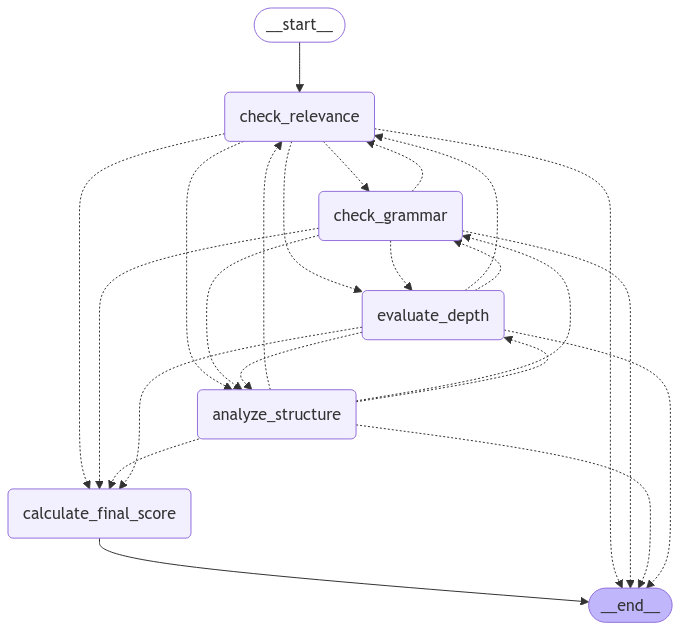

In [65]:
display(
    Image(
        app.get_graph().draw_mermaid_png(
            draw_method=MermaidDrawMethod.API
        )
    )
)

In [66]:
# Essay Grading Function

In [67]:
def grade_essay(essay:str)->dict:
  initial_state = State(
      essay=essay,
      relevance_score=0.0,
      grammar_score=0.0,
      structure_score=0.0,
      depth_score=0.0,
      final_score=0.0
  )
  result = app.invoke(initial_state)
  return result

In [68]:
sample_essay="""
Write an Essay on 'The Importance of Environmental Conservation'

In the modern era, the significance of environmental conservation cannot be overstated. As humanity continues to industrialize and expand its influence, the natural world faces unprecedented challenges. From climate change to deforestation, the need for proactive efforts to protect the environment has never been more urgent. Environmental conservation is essential not only for preserving biodiversity but also for ensuring a sustainable future for generations to come.

One of the primary reasons to prioritize environmental conservation is the preservation of biodiversity. Earth is home to millions of species, each playing a vital role in maintaining ecological balance. The destruction of habitats, driven by deforestation and urbanization, leads to the extinction of species at an alarming rate. For instance, the loss of pollinators such as bees has significant repercussions for agriculture and food production. By conserving natural habitats and protecting endangered species, we safeguard the intricate web of life that sustains human existence.

In addition to biodiversity, environmental conservation is critical for mitigating climate change. Human activities, particularly the burning of fossil fuels, have led to an increase in greenhouse gas emissions. This has resulted in global warming, rising sea levels, and extreme weather events. Conservation efforts, such as reforestation and the transition to renewable energy sources, can help reduce carbon emissions and stabilize the climate. Furthermore, protecting forests and wetlands ensures the continued absorption of carbon dioxide, a crucial factor in combating climate change.

Another vital aspect of environmental conservation is the sustainable management of natural resources. Overexploitation of resources such as water, minerals, and fossil fuels depletes these essential commodities and harms ecosystems. For example, overfishing has led to the collapse of marine populations, threatening both ecological stability and the livelihoods of coastal communities. By adopting sustainable practices, we can balance human needs with environmental preservation, ensuring resources remain available for future generations.

Public awareness and education also play a pivotal role in fostering environmental conservation. When individuals understand the consequences of their actions on the environment, they are more likely to adopt eco-friendly habits. Initiatives such as recycling programs, clean energy campaigns, and environmental education in schools empower communities to contribute to conservation efforts. Collective action, driven by informed citizens, has the potential to bring about meaningful change on a global scale.

In conclusion, environmental conservation is a cornerstone of a sustainable future. By preserving biodiversity, mitigating climate change, and managing natural resources responsibly, humanity can ensure the well-being of the planet and its inhabitants. The responsibility lies with governments, organizations, and individuals alike to prioritize and act on conservation efforts. Only through collective commitment and proactive measures can we secure a healthy and thriving planet for generations to come.
"""

In [69]:
result = grade_essay(sample_essay)
print(result)

{'essay': "\nWrite an Essay on 'The Importance of Environmental Conservation'\n\nIn the modern era, the significance of environmental conservation cannot be overstated. As humanity continues to industrialize and expand its influence, the natural world faces unprecedented challenges. From climate change to deforestation, the need for proactive efforts to protect the environment has never been more urgent. Environmental conservation is essential not only for preserving biodiversity but also for ensuring a sustainable future for generations to come.\n\nOne of the primary reasons to prioritize environmental conservation is the preservation of biodiversity. Earth is home to millions of species, each playing a vital role in maintaining ecological balance. The destruction of habitats, driven by deforestation and urbanization, leads to the extinction of species at an alarming rate. For instance, the loss of pollinators such as bees has significant repercussions for agriculture and food product

In [70]:
result = grade_essay(sample_essay)
print(result)

{'essay': "\nWrite an Essay on 'The Importance of Environmental Conservation'\n\nIn the modern era, the significance of environmental conservation cannot be overstated. As humanity continues to industrialize and expand its influence, the natural world faces unprecedented challenges. From climate change to deforestation, the need for proactive efforts to protect the environment has never been more urgent. Environmental conservation is essential not only for preserving biodiversity but also for ensuring a sustainable future for generations to come.\n\nOne of the primary reasons to prioritize environmental conservation is the preservation of biodiversity. Earth is home to millions of species, each playing a vital role in maintaining ecological balance. The destruction of habitats, driven by deforestation and urbanization, leads to the extinction of species at an alarming rate. For instance, the loss of pollinators such as bees has significant repercussions for agriculture and food product

In [71]:
print(f"Final Score : {result['final_score']:.2f}\n")
print(f"Relevance Score : {result['relevance_score']:.2f}\n")
print(f"Grammar Score : {result['grammar_score']:.2f}\n")
print(f"Depth Score : {result['depth_score']:.2f}\n")
print(f"Structure Score : {result['structure_score']:.2f}\n")

Final Score : 0.22

Relevance Score : 1.00

Grammar Score : 0.95

Depth Score : 0.70

Structure Score : 0.90

